In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import seaborn as sns
import random

def get_model(n_inputs, n_outputs):
   model = Sequential()
   model.add(Dense(128, input_dim=n_inputs, activation='relu'))
   model.add(Dense(48, activation='relu'))
   model.add(Dense(n_outputs))
   model.compile(loss='mse', optimizer='adam')
   return model

so2group = ['SulphurDioxide_SO2_column_number_density','SulphurDioxide_SO2_column_number_density_amf',
            'SulphurDioxide_SO2_slant_column_number_density','SulphurDioxide_cloud_fraction',
            'SulphurDioxide_sensor_azimuth_angle','SulphurDioxide_sensor_azimuth_angle',
            'SulphurDioxide_solar_zenith_angle','SulphurDioxide_SO2_column_number_density_15km']

cogroup = ['CarbonMonoxide_CO_column_number_density','CarbonMonoxide_H2O_column_number_density',
           'CarbonMonoxide_cloud_height','CarbonMonoxide_sensor_altitude',
           'CarbonMonoxide_sensor_azimuth_angle','CarbonMonoxide_sensor_zenith_angle',
           'CarbonMonoxide_solar_azimuth_angle','CarbonMonoxide_solar_zenith_angle']

#below %20 so excluded from dataset
no2group = ['NitrogenDioxide_NO2_column_number_density','NitrogenDioxide_tropospheric_NO2_column_number_density',
            'NitrogenDioxide_stratospheric_NO2_column_number_density','NitrogenDioxide_NO2_slant_column_number_density',
            'NitrogenDioxide_tropopause_pressure','NitrogenDioxide_absorbing_aerosol_index',
            'NitrogenDioxide_cloud_fraction','NitrogenDioxide_sensor_altitude',
            'NitrogenDioxide_sensor_azimuth_angle','NitrogenDioxide_sensor_zenith_angle',
            'NitrogenDioxide_solar_azimuth_angle','NitrogenDioxide_solar_zenith_angle']

ch2ogroup = ['Formaldehyde_tropospheric_HCHO_column_number_density','Formaldehyde_tropospheric_HCHO_column_number_density_amf',
             'Formaldehyde_HCHO_slant_column_number_density','Formaldehyde_cloud_fraction',
             'Formaldehyde_solar_zenith_angle','Formaldehyde_solar_azimuth_angle',
             'Formaldehyde_sensor_zenith_angle','Formaldehyde_sensor_azimuth_angle']

uvindex = ['UvAerosolIndex_absorbing_aerosol_index','UvAerosolIndex_sensor_altitude',
             'UvAerosolIndex_sensor_azimuth_angle','UvAerosolIndex_sensor_zenith_angle',
             'UvAerosolIndex_sensor_zenith_angle','UvAerosolIndex_solar_zenith_angle']

o3group = ['Ozone_O3_column_number_density','Ozone_O3_column_number_density_amf',
           'Ozone_O3_slant_column_number_density','Ozone_O3_effective_temperature',
           'Ozone_cloud_fraction','Ozone_sensor_azimuth_angle','Ozone_sensor_zenith_angle',
           'Ozone_solar_azimuth_angle','Ozone_solar_zenith_angle']

#below %20 so excluded from dataset
uvlayer = ['UvAerosolLayerHeight_aerosol_height','UvAerosolLayerHeight_aerosol_pressure',
           'UvAerosolLayerHeight_aerosol_optical_depth','UvAerosolLayerHeight_sensor_zenith_angle',
           'UvAerosolLayerHeight_sensor_azimuth_angle','UvAerosolLayerHeight_solar_azimuth_angle',
           'UvAerosolLayerHeight_solar_zenith_angle']

cloud = ['Cloud_cloud_fraction','Cloud_cloud_top_pressure','Cloud_cloud_top_height',
         'Cloud_cloud_base_pressure','Cloud_cloud_base_height','Cloud_cloud_optical_depth',
         'Cloud_surface_albedo','Cloud_sensor_azimuth_angle','Cloud_sensor_zenith_angle',
         'Cloud_solar_azimuth_angle','Cloud_solar_zenith_angle']

dataset = pd.read_csv('emission/train.csv')
testset = pd.read_csv('emission/test.csv')

In [2]:
a = dataset.isnull().sum()/len(dataset)*100
variables = dataset.columns
variable = [ ]
for i in range(dataset.columns.shape[0]):
    if a[i]<=20: #setting the threshold as 20%
        variable.append(variables[i])
dataset = dataset[variable]
dataset = dataset.drop(['ID_LAT_LON_YEAR_WEEK'], axis=1)
dataset = dataset.fillna(dataset.mean())
dataset = dataset.drop(dataset[dataset['emission'] > 600].index)
dataset

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
3,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,72.820518,55.988022,...,5459.185355,60657.101913,4590.879504,20.245954,0.304797,-35.140368,40.113533,-129.935508,32.095214,29.404171
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,-12.856753,19.435339,...,5606.449457,60168.191528,4659.130378,6.104610,0.314015,4.667058,47.528435,-134.252871,30.771469,29.186497
79020,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,-7.925870,37.436189,...,6222.646776,56596.027209,5222.646823,14.817885,0.288058,-0.340922,35.328098,-134.731723,30.716166,29.131205
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-100.344827,32.599393,...,7896.456885,46533.348194,6946.858022,32.594768,0.274047,8.427699,48.295652,-139.447849,29.112868,28.125792


In [3]:
X = dataset.drop(['emission'], axis=1).values
y = (dataset['emission']).values

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=random.randint(1,100))

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

n_inputs, n_outputs = 55, 1
model = get_model(n_inputs, n_outputs)
history = model.fit(x_train, y_train,validation_data=(x_test, y_test), verbose=0, epochs=100, batch_size=100)

y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns = ['emission']).values
y_test = pd.DataFrame(y_test, columns = ['emission']).values

1230/1230 [==============================] - 1s 598us/step


In [4]:
train_mae = model.evaluate(x_train, y_train, verbose=0)
test_mae = model.evaluate(x_test, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae, test_mae))

Train: 4096.101, Test: 5293.609


In [5]:
error = mean_squared_error(y_test, y_pred, squared=False)
print("RMSE: " + str("{:.2f}".format(error)))

RMSE: 72.76


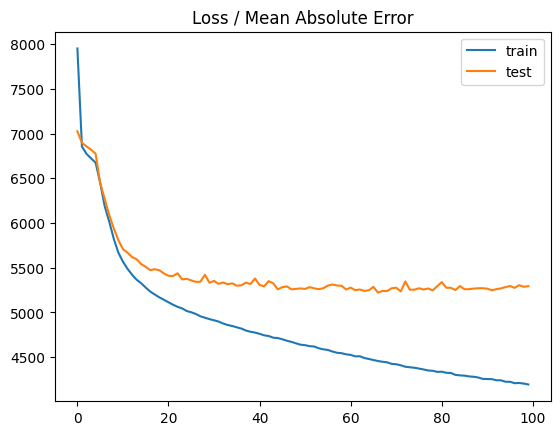

In [6]:
plt.title('Loss / Mean Absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

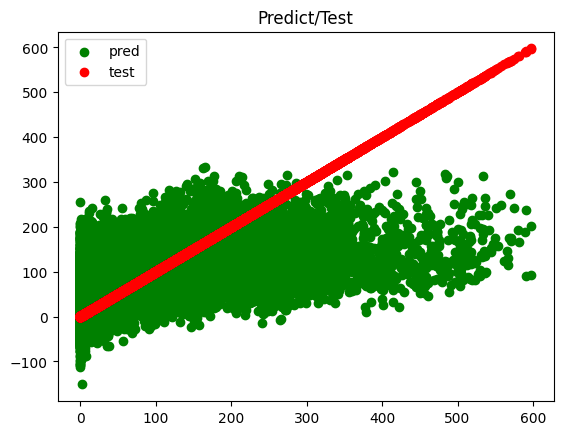

In [7]:
plt.title('Predict/Test')
plt.scatter(y_test, y_pred, c='green', label='pred')
plt.scatter(y_test, y_test, c='red', label='test')
plt.legend()
plt.show()

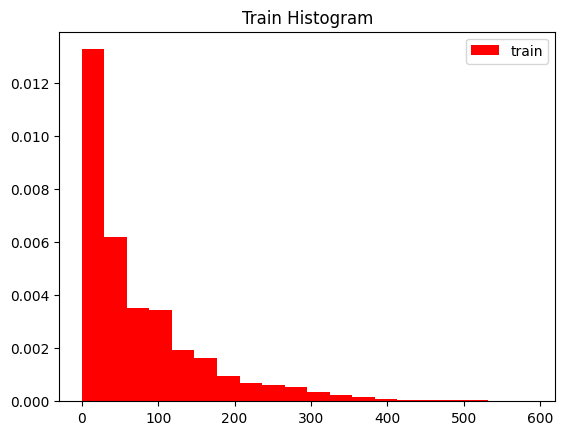

In [8]:
plt.title('Train Histogram')
plt.hist(y_train,20,color='red',histtype='bar',density=True,label='train')
plt.legend()
plt.show()

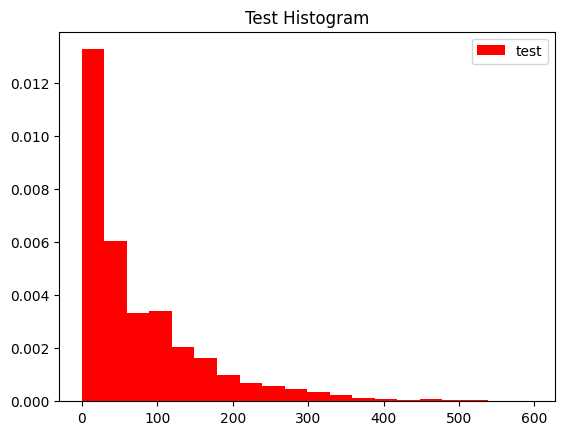

In [9]:
plt.title('Test Histogram')
plt.hist(y_test,20,color='red',histtype='bar',density=True,label='test')
plt.legend()
plt.show()

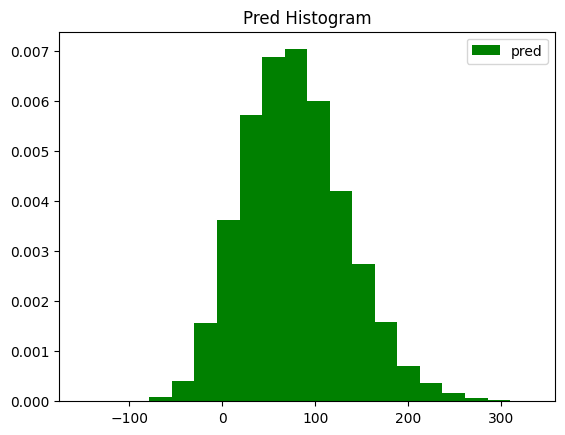

In [10]:
plt.title('Pred Histogram')
plt.hist(y_pred,20,color='green',histtype='bar',density=True,label='pred')
plt.legend()
plt.show()

In [11]:
guess = pd.DataFrame(y_test, columns = ['Test'])
guess['Pred'] = y_pred
print(guess)

             Test        Pred
0      235.341300  145.172195
1        0.000000   27.651300
2      280.388460   82.141197
3       63.818140   94.910446
4        7.365861   63.942696
...           ...         ...
39342   42.281580   80.794975
39343   26.643444   47.061653
39344  155.269790   57.256088
39345   28.977854  -49.296028
39346   36.993736   36.876877

[39347 rows x 2 columns]


<Axes: >

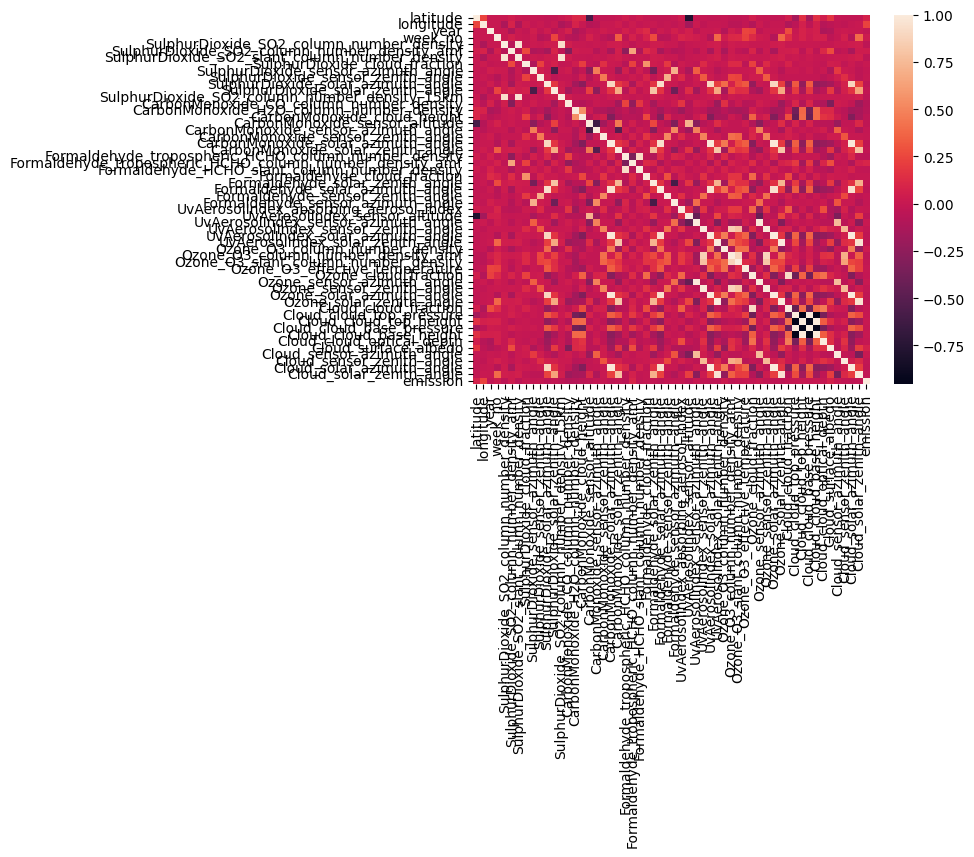

In [12]:
corri = dataset
corri['emission'] = dataset['emission']
corr = corri.corr()
sns.heatmap(corr, 
xticklabels=corr.columns.values,
yticklabels=corr.columns.values)